***<center><h1>Analise Geral do Perfil de Consumo de Drogas</h1></center>***

### Integrantes:
    - ISMAEL MESQUITA DE ARAUJO                | Matrícula: 20210094680
    - NATANAEL DE LIMA COSTA NETO              | Matrícula: 20190038391



## ***Introdução e Objetivos***

O vicio em substancias e drogas, sejam elas licitas ou ilicitas, é um problema social e de saúde pública presente de forma grave na nossa sociedade atual.

Com esta informação em mente, este projeto busca de forma simples e direta através de analises de um dataset sobre o consumo de drogas, analisar correlações e padrões relacionados com o consumo de drogas que podem servir de base para entender melhor esse comportamento na nossa sociedade.

A motivação para tal projeto surgiu da vontade dos autores de procurar respostas para algumas dúvidas que surgiram sobre o uso de diversas substâncias, sejam elas legais ou ilegais, em especial relacionadas a correlações entre o consumo de determinadas drogas e caracteristicas inerentes a cada individuo.

### ***Objetivo geral:***
- Analisar de forma direta os dados contidos no dataset referente ao consumo de drogas(licitas e ilicitas) e sua relação com outros fatores.

### ***Perguntas que nos propomos a responder:***

1. O consumo de drogas é mais frequente em individuos com ensino superior, sem diploma ou indeferente? 

2. Há alguma infleuncia de genero no consumo de drogas?

3. Qual a relação entre a idade e a incidencia do uso de drogas?


### ***Bibliotecas utilizadas***

Para a análise, as seguintes bibliotecas foram utilizadas:

In [ ]:
import pandas as pd
import seaborn as sns
 



## **Dados**

### Os dados foram obtidos no [Kaggle](https://www.kaggle.com/datasets/obeykhadija/drug-consumptions-uci) e serviram como base para todo o projeto. O arquivo Drug_Consumption.csv conta com a prospecção dos seguintes dados de 1884 individuos:
---
## ***Dados de Identificação***

*   ID: Numero de referencia para cada participante da pesquisa
*   Age: Idade de cada participante divida em 6 grupos de faixas etárias que começam a partir de 18 anose vão até +65 anos.
*   Gender: Genero podendo ser M (Masculino) ou F (Feminino)
*   Education: A escolaridade divida em	4 grupos (Doutorando | Profissionais certificados | Mestrando | Graduando | Universitario sem diploma | Deixou a escola antes dos 16 | deixou a escola aos 16 | deixou a escola aos 17 | deixou a escola aos 18)
*   Country: País de cada participante (Sendo a maioria analisada, 1043 individuos, do Reino Unido)
*   Ethnicity: Etnia de cada participante dividida em 7 grupos (asiaticos | pretos | brancos | preto/asiatico | preto/branco | asiatico/negro | Outra) sendo a esmagadora maioria, com 1720 ocorrencias, brancos	
---
## ***Dados de Personalidade***

*   Nscore: Valor de Neuroticismo no teste NEO-FFI-R
*   Escore: Valor de Extroversão no teste NEO-FFI-R
*   Oscore: Valor de Abertura à Experiência no teste NEO-FFI-R
*   AScore:	Valor de Amabilidade no teste NEO-FFI-R
*   Cscore: Valor de Conscienciosidade no teste NEO-FFI-R	
*   Impulsive: Valor de Impulsividade medido por BIS-11 (Barratt Impulsiveness Scale Version 11)	
*   SS: Valor de busca de sensações medida por ImpSS (Impulsive Sensation-Seeking)
---
## ***Dados referentes ao Consumo de Substancias***

*   Alcohol: consumo de álcool
*   Amphet: consumo de anfetaminas	
*   Amyl: consumo de nitrito de amila	
*   Benzos: consumo de benzodiazepínicos
*   Caff: consumo de cafeina	
*   Cannabis: consumo de cannabis	
*   Choc: consumo de chocolate	
*   Coke: consumo de cocaina	
*   Crack: consumo de crack	
*   Ecstasy: consumo de extase	
*   Heroin: consumo de heroina	
*   Ketamine: consumo de cetamina	
*   Legalh: consumo de drogas legais	
*   LSD: consumo de LSD	
*   Meth: consumo de metanfetamina	
*   Mushrooms: consumo de cogumelos alucinogenos	
*   Nicotine: consumo de nicotina	
*   Semer: consumo de droga ficcticia (grupo controle)	
*   VSA: clase de consumo de abuso de substancias volateis

>> ### ***O consumo é quantificado de 0 a 6 sendo***:
>>
>> * CL0 = Nunca usaram
>> * CL1 = Usaram há mais de 10 anos
>> * CL2 = Usaram nos últimos 10 anos
>> * CL3 = Usaram no último ano
>> * CL4 = Usaram no último mês
>> * CL5 = Usaram na última semana
>> * CL6 = Usaram no último dia










In [ ]:
df_means =  pd.read_csv('datasets/Drug_Consumption.csv')
df_means.head(5)

,Unnamed: 0,ID,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,...,Ecstasy,Heroin,Ketamine,Legalh,LSD,Meth,Mushrooms,Nicotine,Semer,VSA
0,0,2,25-34,M,Doctorate degree,UK,White,-0.67825,1.93886,1.43533,...,4,0,2,0,2,3,0,4,0,0
1,1,3,35-44,M,Professional certificate/ diploma,UK,White,-0.46725,0.80523,-0.84732,...,0,0,0,0,0,0,1,0,0,0
2,2,4,18-24,F,Masters degree,UK,White,-0.14882,-0.80615,-0.01928,...,0,0,2,0,0,0,0,2,0,0
3,3,5,35-44,F,Doctorate degree,UK,White,0.73545,-1.63340,-0.45174,...,1,0,0,1,0,0,2,2,0,0
4,4,6,65+,F,Left school at 18 years,Canada,White,-0.67825,-0.30033,-1.55521,...,0,0,0,0,0,0,0,6,0,0


Para realizar a analise exploratoria dos dados e entender melhor o dataset criamos a seguinte função e aplicamos a cada coluna:

In [ ]:
#função para realizar a analise exploratoria dos dados
def infos(data, info = '', describe = True, means = [], fraction = True):

    #Cria um data frame com a informacao solicitada e sua frequencia
    df = data[info].value_counts().reset_index()
    df.rename(columns = {'index' : info, info : 'Count'}, inplace = True)
    
    if fraction: #Fraction retorna uma coluna no data frame com a porcentagem das frequencias
        fractions = (((df['Count'])*100)/(data[info].describe()['count']))
        df['Fraction(%)'] = round(fractions, 2)
    
    if (means != []): #means retorna o significado de cada linha do dataframe
        a = pd.Series(means)
        df['Meaning'] = a

    if describe: #realiza a função describe do pandas
        print('Describe:')
        print(data[info].describe())
    
    print(df)

In [ ]:
infos(df_means, info='Age')

Describe:
count      1884
unique        6
top       18-24
freq        643
Name: Age, dtype: object
     Age  Count  Fraction(%)
0  18-24    643        34.13
1  25-34    481        25.53
2  35-44    355        18.84
3  45-54    294        15.61
4  55-64     93         4.94
5    65+     18         0.96


- A parte mais significativa do DataSet esta na faixa etaria até 54 anos


In [ ]:
df_means['Age'].value_counts().index

Index(['18-24', '25-34', '35-44', '45-54', '55-64', '65+'], dtype='object')

In [ ]:
infos(df_means, info='Gender')

Describe:
count     1884
unique       2
top          M
freq       943
Name: Gender, dtype: object
  Gender  Count  Fraction(%)
0      M    943        50.05
1      F    941        49.95


In [ ]:
infos(df_means, info='Education')

Describe:
count                                                  1884
unique                                                    9
top       Some college or university, no certificate or ...
freq                                                    506
Name: Education, dtype: object
                                           Education  Count  Fraction(%)
0  Some college or university, no certificate or ...    506        26.86
1                                  University degree    480        25.48
2                                     Masters degree    283        15.02
3                  Professional certificate/ diploma    269        14.28
4                            Left school at 18 years    100         5.31
5                            Left school at 16 years     99         5.25
6                                   Doctorate degree     89         4.72
7                            Left school at 17 years     30         1.59
8                        Left school before 16 years     28   

- Individuos com escolaridade de nivel superior (University degree | Masters degree | Professional certificate/diploma | Doctorate degree) representam aproximadamente 86.36 % do dataset


In [ ]:
infos(df_means, info='Country')

Describe:
count     1884
unique       7
top         UK
freq      1043
Name: Country, dtype: object
               Country  Count  Fraction(%)
0                   UK   1043        55.36
1                  USA    557        29.56
2                Other    118         6.26
3               Canada     87         4.62
4            Australia     54         2.87
5  Republic of Ireland     20         1.06
6          New Zealand      5         0.27


- A parte mais significativa do dataset são de individuos dos Estados Unidos da America e do Reino Unido, de forma que as inferencias aqui serão mais relevantes respectivamente para esses paises citados, ainda que de forma geral o seguinte trabalho deva se aplicar a demais contextos, vale ressaltar que cada localidade tem sua propria cultura e especificidades


In [ ]:
infos(df_means, info='Ethnicity')

Describe:
count      1884
unique        7
top       White
freq       1720
Name: Ethnicity, dtype: object
           Ethnicity  Count  Fraction(%)
0              White   1720        91.30
1              Other     63         3.34
2              Black     33         1.75
3              Asian     26         1.38
4  Mixed-White/Black     20         1.06
5  Mixed-White/Asian     19         1.01
6  Mixed-Black/Asian      3         0.16


- A incidencia de outras etnias (não brancos) nesse DataSet é pequena demais para realizar qualquer analise etnica relevante

In [ ]:
df_quant = pd.read_csv('datasets/Drug_Consumption_Quantified.csv')
df_quant

,Unnamed: 0,ID,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,...,Ecstasy,Heroin,Ketamine,Legalh,LSD,Meth,Mushrooms,Nicotine,Semer,VSA
0,0,2,-0.07854,-0.48246,1.98437,0.96082,-0.31685,-0.67825,1.93886,1.43533,...,4,0,2,0,2,3,0,4,0,0
1,1,3,0.49788,-0.48246,-0.05921,0.96082,-0.31685,-0.46725,0.80523,-0.84732,...,0,0,0,0,0,0,1,0,0,0
2,2,4,-0.95197,0.48246,1.16365,0.96082,-0.31685,-0.14882,-0.80615,-0.01928,...,0,0,2,0,0,0,0,2,0,0
3,3,5,0.49788,0.48246,1.98437,0.96082,-0.31685,0.73545,-1.63340,-0.45174,...,1,0,0,1,0,0,2,2,0,0
4,4,6,2.59171,0.48246,-1.22751,0.24923,-0.31685,-0.67825,-0.30033,-1.55521,...,0,0,0,0,0,0,0,6,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1879,1879,1884,-0.95197,0.48246,-0.61113,-0.57009,-0.31685,-1.19430,1.74091,1.88511,...,0,0,0,3,3,0,0,0,0,5
1880,1880,1885,-0.95197,-0.48246,-0.61113,-0.57009,-0.31685,-0.24649,1.74091,0.58331,...,2,0,0,3,5,4,4,5,0,0
1881,1881,1886,-0.07854,0.48246,0.45468,-0.57009,-0.31685,1.13281,-1.37639,-1.27553,...,4,0,2,0,2,0,2,6,0,0
1882,1882,1887,-0.95197,0.48246,-0.61113,-0.57009,-0.31685,0.91093,-1.92173,0.29338,...,3,0,0,3,3,0,3,4,0,0


In [ ]:
infos(df_quant, info='Age')

Describe:
count    1884.000000
mean        0.034364
std         0.878529
min        -0.951970
25%        -0.951970
50%        -0.078540
75%         0.497880
max         2.591710
Name: Age, dtype: float64
       Age  Count  Fraction(%)
0 -0.95197    643        34.13
1 -0.07854    481        25.53
2  0.49788    355        18.84
3  1.09449    294        15.61
4  1.82213     93         4.94
5  2.59171     18         0.96


In [ ]:
infos(df_quant, 'Age', means=['18-24', '25-34', '35-44', '45-54', '55-64','65+'])

Describe:
count    1884.000000
mean        0.034364
std         0.878529
min        -0.951970
25%        -0.951970
50%        -0.078540
75%         0.497880
max         2.591710
Name: Age, dtype: float64
       Age  Count  Fraction(%) Meaning
0 -0.95197    643        34.13   18-24
1 -0.07854    481        25.53   25-34
2  0.49788    355        18.84   35-44
3  1.09449    294        15.61   45-54
4  1.82213     93         4.94   55-64
5  2.59171     18         0.96     65+


##Pré-processamento

Para trabalhar melhor com nossos dados, tranformamos as variaveis de consumo de drogas em int

In [ ]:
drugs_df_drugs = df_means.loc[:, "Alcohol":"VSA"]
drugs_df_drugs.head(5)

,Alcohol,Amphet,Amyl,Benzos,Caff,Cannabis,Choc,Coke,Crack,Ecstasy,Heroin,Ketamine,Legalh,LSD,Meth,Mushrooms,Nicotine,Semer,VSA
0,5,2,2,0,6,4,6,3,0,4,0,2,0,2,3,0,4,0,0
1,6,0,0,0,6,3,4,0,0,0,0,0,0,0,0,1,0,0,0
2,4,0,0,3,5,2,4,2,0,0,0,2,0,0,0,0,2,0,0
3,4,1,1,0,6,3,6,0,0,1,0,0,1,0,0,2,2,0,0
4,2,0,0,0,6,0,4,0,0,0,0,0,0,0,0,0,6,0,0


- Criamos um Dataset auxiliar local apenas com as informações de consumo de drogas para fazer as mudanças


In [ ]:
def mude(data, tipo, lista):
    for i in data.columns:
        if ((type(data[i][0])) == tipo):
            data[i] = data[i].map(lista)
    return data

In [ ]:
df_quant = mude(data = df_quant, tipo = str, lista = {'CL0' : 0,'CL1' : 1, 'CL2' : 2, 'CL3' : 3, 'CL4' : 4, 'CL5' : 5, 'CL6' : 6})
drugs_df_drugs = mude(data = drugs_df_drugs, tipo = str, lista = {'CL0' : 0,'CL1' : 1, 'CL2' : 2, 'CL3' : 3, 'CL4' : 4, 'CL5' : 5, 'CL6' : 6})


In [ ]:
for i in drugs_df_drugs.columns:
    df_means[i] = drugs_df_drugs[i]

In [ ]:
df_drugs_binaryE = df_means.loc[:, "Education":"VSA"]

df_drugs_binaryE = mude(data = df_drugs_binaryE, tipo = str, lista = {'Some college or university, no certificate or degree' : 'No certificate or degree',
       'University degree' : 'higher education', 'Masters degree' : 'higher education',
       'Professional certificate/ diploma' : 'higher education', 'Left school at 18 years' : 'No certificate or degree',
       'Left school at 16 years' : 'No certificate or degree', 'Doctorate degree' : 'higher education',
       'Left school at 17 years' : 'No certificate or degree', 'Left school before 16 years' : 'No certificate or degree'})

df_drugs_binaryE.head(5)

,Education,Country,Ethnicity,Nscore,Escore,Oscore,AScore,Cscore,Impulsive,SS,...,Ecstasy,Heroin,Ketamine,Legalh,LSD,Meth,Mushrooms,Nicotine,Semer,VSA
0,higher education,NaN,NaN,-0.67825,1.93886,1.43533,0.76096,-0.14277,-0.71126,-0.21575,...,4,0,2,0,2,3,0,4,0,0
1,higher education,NaN,NaN,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,-1.37983,0.40148,...,0,0,0,0,0,0,1,0,0,0
2,higher education,NaN,NaN,-0.14882,-0.80615,-0.01928,0.59042,0.58489,-1.37983,-1.18084,...,0,0,2,0,0,0,0,2,0,0
3,higher education,NaN,NaN,0.73545,-1.63340,-0.45174,-0.30172,1.30612,-0.21712,-0.21575,...,1,0,0,1,0,0,2,2,0,0
4,No certificate or degree,NaN,NaN,-0.67825,-0.30033,-1.55521,2.03972,1.63088,-1.37983,-1.54858,...,0,0,0,0,0,0,0,6,0,0


- Criamos ainda outro DataSet auxiliar local que separa a escolaridade dos individuos em dois grandes grupos maiores (higher education | No certificate or degree) para realizar uma analise binaria com base nesses dados a seguir

In [ ]:
#Salvando os datasets limpos
df_means = df_means.drop(columns=['Unnamed: 0.1'])
drugs_df = df_means.drop(columns=['Unnamed: 0'])
df_quant.to_csv("datasets/DrugsDatasetQuant.csv")
df_means.to_csv("datasets/Drug_Consumption.csv")

In [ ]:
df_means

,Unnamed: 0,ID,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,...,Ecstasy,Heroin,Ketamine,Legalh,LSD,Meth,Mushrooms,Nicotine,Semer,VSA
0,0,2,25-34,M,Doctorate degree,UK,White,-0.67825,1.93886,1.43533,...,4,0,2,0,2,3,0,4,0,0
1,1,3,35-44,M,Professional certificate/ diploma,UK,White,-0.46725,0.80523,-0.84732,...,0,0,0,0,0,0,1,0,0,0
2,2,4,18-24,F,Masters degree,UK,White,-0.14882,-0.80615,-0.01928,...,0,0,2,0,0,0,0,2,0,0
3,3,5,35-44,F,Doctorate degree,UK,White,0.73545,-1.63340,-0.45174,...,1,0,0,1,0,0,2,2,0,0
4,4,6,65+,F,Left school at 18 years,Canada,White,-0.67825,-0.30033,-1.55521,...,0,0,0,0,0,0,0,6,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1879,1879,1884,18-24,F,"Some college or university, no certificate or ...",USA,White,-1.19430,1.74091,1.88511,...,0,0,0,3,3,0,0,0,0,5
1880,1880,1885,18-24,M,"Some college or university, no certificate or ...",USA,White,-0.24649,1.74091,0.58331,...,2,0,0,3,5,4,4,5,0,0
1881,1881,1886,25-34,F,University degree,USA,White,1.13281,-1.37639,-1.27553,...,4,0,2,0,2,0,2,6,0,0
1882,1882,1887,18-24,F,"Some college or university, no certificate or ...",USA,White,0.91093,-1.92173,0.29338,...,3,0,0,3,3,0,3,4,0,0


In [ ]:
df_quant

,Unnamed: 0,ID,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,...,Ecstasy,Heroin,Ketamine,Legalh,LSD,Meth,Mushrooms,Nicotine,Semer,VSA
0,0,2,-0.07854,-0.48246,1.98437,0.96082,-0.31685,-0.67825,1.93886,1.43533,...,4,0,2,0,2,3,0,4,0,0
1,1,3,0.49788,-0.48246,-0.05921,0.96082,-0.31685,-0.46725,0.80523,-0.84732,...,0,0,0,0,0,0,1,0,0,0
2,2,4,-0.95197,0.48246,1.16365,0.96082,-0.31685,-0.14882,-0.80615,-0.01928,...,0,0,2,0,0,0,0,2,0,0
3,3,5,0.49788,0.48246,1.98437,0.96082,-0.31685,0.73545,-1.63340,-0.45174,...,1,0,0,1,0,0,2,2,0,0
4,4,6,2.59171,0.48246,-1.22751,0.24923,-0.31685,-0.67825,-0.30033,-1.55521,...,0,0,0,0,0,0,0,6,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1879,1879,1884,-0.95197,0.48246,-0.61113,-0.57009,-0.31685,-1.19430,1.74091,1.88511,...,0,0,0,3,3,0,0,0,0,5
1880,1880,1885,-0.95197,-0.48246,-0.61113,-0.57009,-0.31685,-0.24649,1.74091,0.58331,...,2,0,0,3,5,4,4,5,0,0
1881,1881,1886,-0.07854,0.48246,0.45468,-0.57009,-0.31685,1.13281,-1.37639,-1.27553,...,4,0,2,0,2,0,2,6,0,0
1882,1882,1887,-0.95197,0.48246,-0.61113,-0.57009,-0.31685,0.91093,-1.92173,0.29338,...,3,0,0,3,3,0,3,4,0,0


## 1. O consumo de drogas é mais frequente em individuos com ensino superior, sem diploma ou indeferente? 


- Para responder essa pergunta analisamos o histograma da relação entre consumo de cada droga e a escolaridade, segmentando tambem em apenas dois grandes grupos: Individuos com formação superior e aqueles que não o possuem. Vale salientar que o DataSet conta com mais dados de pessoas pertencentes a esta primeira categoria e isso deve ser levado em conta ao analisarmos cada histograma 

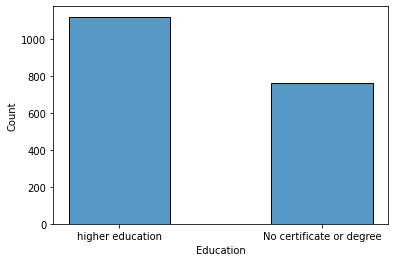

In [ ]:
sns.histplot(x= df_drugs_binaryE["Education"], multiple="dodge",shrink=.5, palette="bright") 

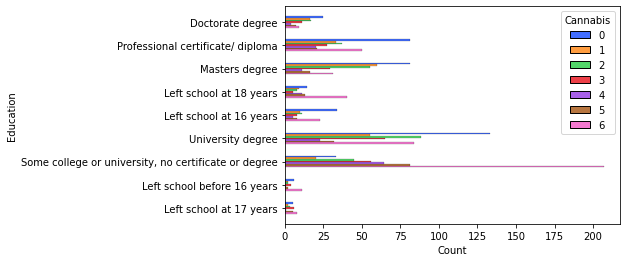

In [ ]:
sns.histplot(y= df_means["Education"],hue = df_means['Cannabis'], multiple="dodge",shrink=.5, palette="bright")

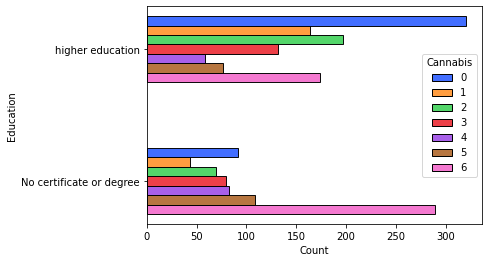

In [ ]:
sns.histplot(y= df_drugs_binaryE["Education"],hue = df_drugs_binaryE['Cannabis'], multiple="dodge",shrink=.5, palette="bright")

- Aqui podemos notar que a maior incidencia de usuarios frequentes de maconha não possuem formação superior

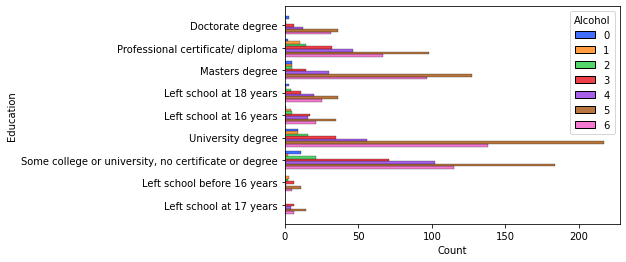

In [ ]:
sns.histplot(y= df_means["Education"],hue = df_means['Alcohol'], multiple="dodge",shrink=.8, palette="bright")

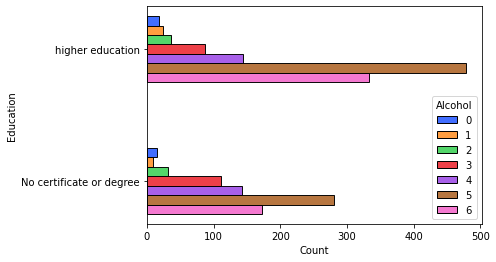

In [ ]:
sns.histplot(y= df_drugs_binaryE["Education"],hue = df_drugs_binaryE['Alcohol'], multiple="dodge",shrink=.5, palette="bright")

- Aqui podemos notar que o consumo de alcool é relativamente proporcional, independentemente da formação profissional do individuo

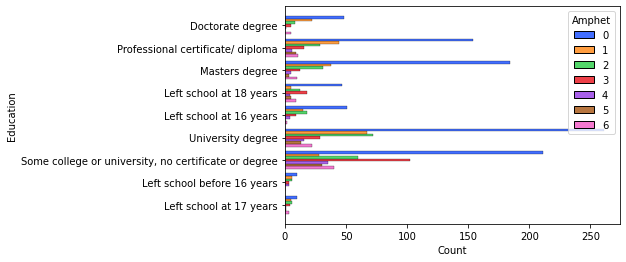

In [ ]:
sns.histplot(y= df_means["Education"],hue = df_means['Amphet'], multiple="dodge",shrink=.8, palette="bright")

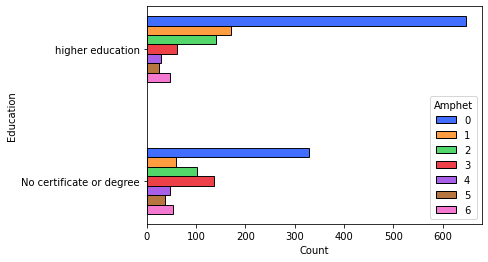

In [ ]:
sns.histplot(y= df_drugs_binaryE["Education"],hue = df_drugs_binaryE['Amphet'], multiple="dodge",shrink=.5, palette="bright")

- Aqui podemos notar que o consumo de anfetamina é levemente maior em não formados 

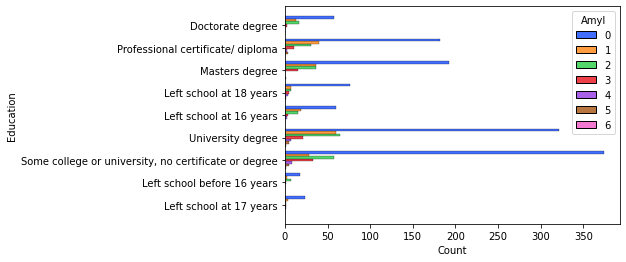

In [ ]:
sns.histplot(y= df_means["Education"],hue = df_means['Amyl'], multiple="dodge",shrink=.8, palette="bright")

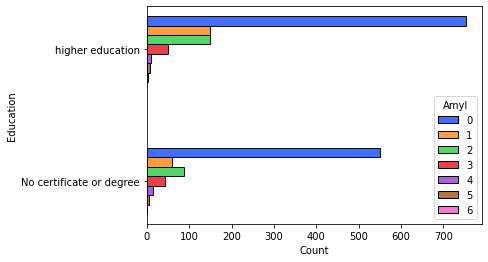

In [ ]:
sns.histplot(y= df_drugs_binaryE["Education"],hue = df_drugs_binaryE['Amyl'], multiple="dodge",shrink=.5, palette="bright")

- Aqui podemos notar que o consumo de nitrato de amila é relativamente proporcional, independentemente da formação profissional do individuo

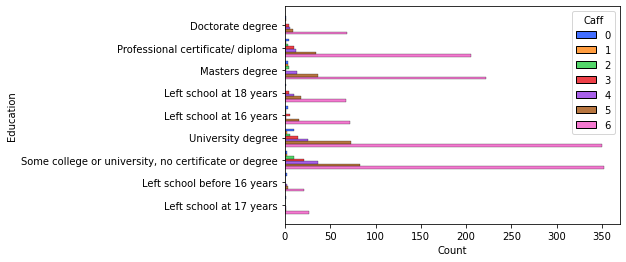

In [ ]:
sns.histplot(y= df_means["Education"],hue = df_means['Caff'], multiple="dodge",shrink=.8, palette="bright")

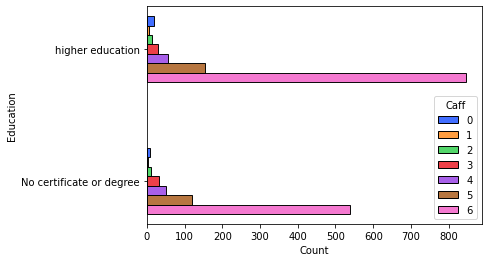

In [ ]:
sns.histplot(y= df_drugs_binaryE["Education"],hue = df_drugs_binaryE['Caff'], multiple="dodge",shrink=.5, palette="bright")

- Aqui podemos notar que o consumo de Cafeina é relativamente proporcional, independentemente da formação profissional do individuo

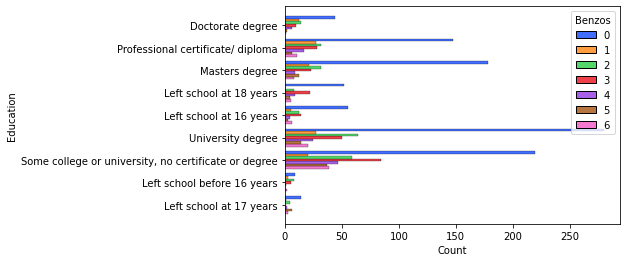

In [ ]:
sns.histplot(y= df_means["Education"],hue = df_means['Benzos'], multiple="dodge",shrink=.8, palette="bright")

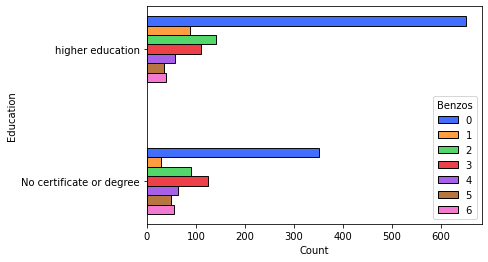

In [ ]:
sns.histplot(y= df_drugs_binaryE["Education"],hue = df_drugs_binaryE['Benzos'], multiple="dodge",shrink=.5, palette="bright")

- Aqui podemos notar que o consumo de benzos é levemente maior em não formados

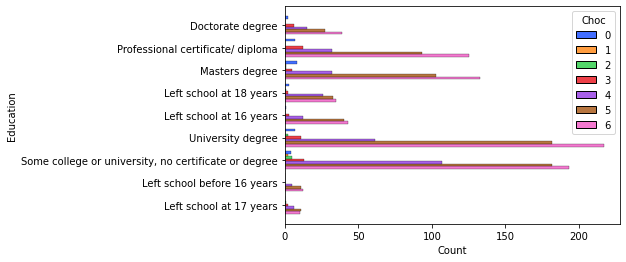

In [ ]:
sns.histplot(y= df_means["Education"],hue = df_means['Choc'], multiple="dodge",shrink=.8, palette="bright")

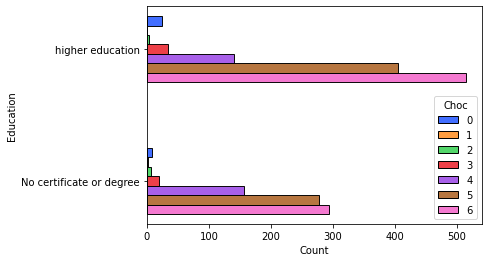

In [ ]:
sns.histplot(y= df_drugs_binaryE["Education"],hue = df_drugs_binaryE['Choc'], multiple="dodge",shrink=.5, palette="bright")

- Aqui podemos notar que o consumo de chocolate é relativamente proporcional, independentemente da formação profissional do individuo

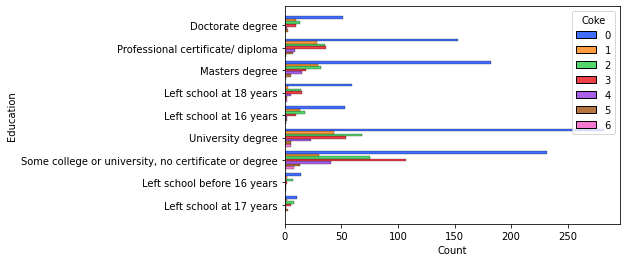

In [ ]:
sns.histplot(y= df_means["Education"],hue = df_means['Coke'], multiple="dodge",shrink=.8, palette="bright")

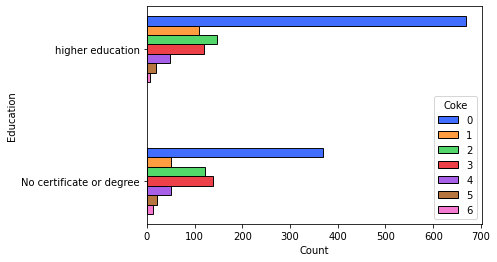

In [ ]:
sns.histplot(y= df_drugs_binaryE["Education"],hue = df_drugs_binaryE['Coke'], multiple="dodge",shrink=.5, palette="bright")

- Aqui podemos notar que o consumo de cocaina é relativamente proporcional, independentemente da formação profissional do individuo

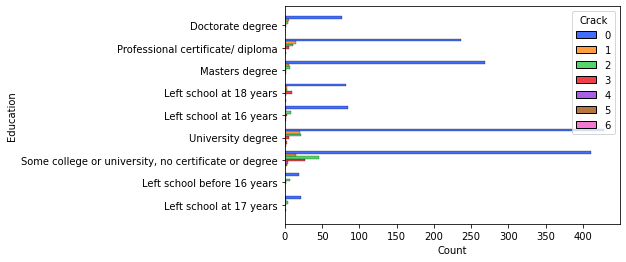

In [ ]:
sns.histplot(y= df_means["Education"],hue = df_means['Crack'], multiple="dodge",shrink=.8, palette="bright")

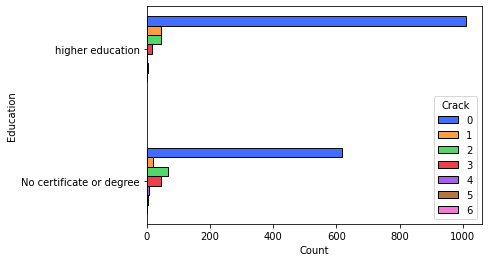

In [ ]:
sns.histplot(y= df_drugs_binaryE["Education"],hue = df_drugs_binaryE['Crack'], multiple="dodge",shrink=.5, palette="bright")

- Aqui podemos notar que o consumo de Crack é relativamente proporcional, independentemente da formação profissional do individuo

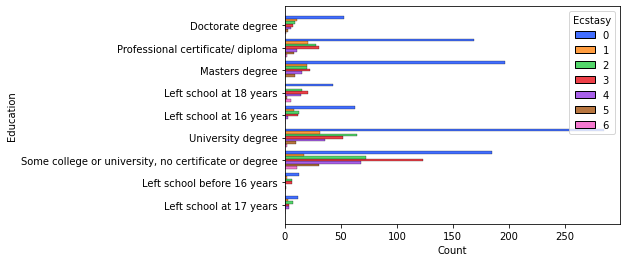

In [ ]:
sns.histplot(y= df_means["Education"],hue = df_means['Ecstasy'], multiple="dodge",shrink=.8, palette="bright")

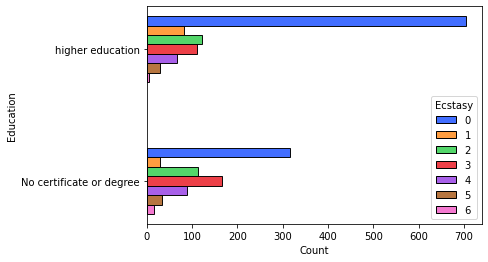

In [ ]:
sns.histplot(y= df_drugs_binaryE["Education"],hue = df_drugs_binaryE['Ecstasy'], multiple="dodge",shrink=.5, palette="bright")

- Aqui podemos notar que o consumo de Ecstasy é levemente maior em individuos sem diploma

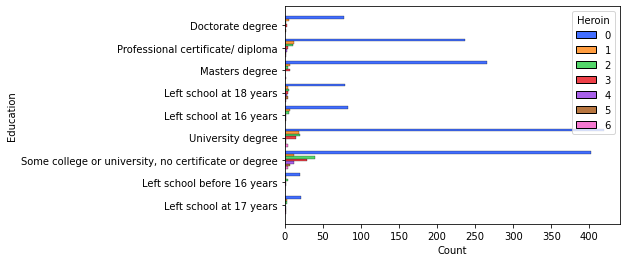

In [ ]:
sns.histplot(y= df_means["Education"],hue = df_means['Heroin'], multiple="dodge",shrink=.8, palette="bright")

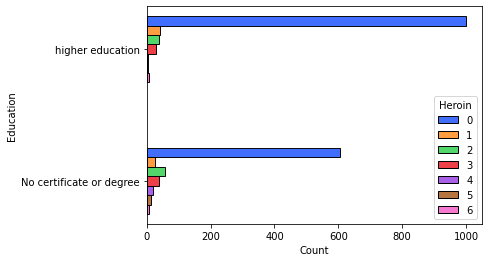

In [ ]:
sns.histplot(y= df_drugs_binaryE["Education"],hue = df_drugs_binaryE['Heroin'], multiple="dodge",shrink=.5, palette="bright")

- Aqui podemos notar que o consumo de Heroina é relativamente proporcional, independentemente da escolatidade do individuo

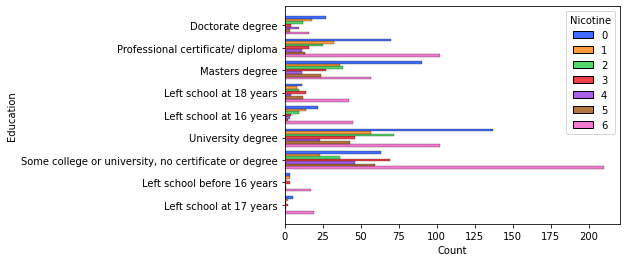

In [ ]:
sns.histplot(y= df_means["Education"],hue = df_means['Nicotine'], multiple="dodge",shrink=.8, palette="bright")

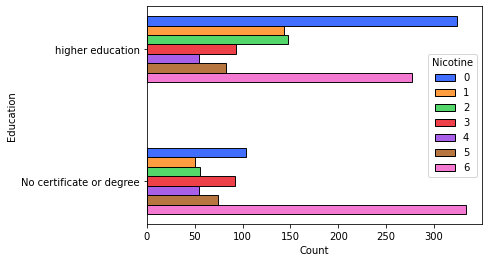

In [ ]:
sns.histplot(y= df_drugs_binaryE["Education"],hue = df_drugs_binaryE['Nicotine'], multiple="dodge",shrink=.5, palette="bright")

- Aqui podemos notar que o consumo de Nicotina é maior em individuos sem diploma

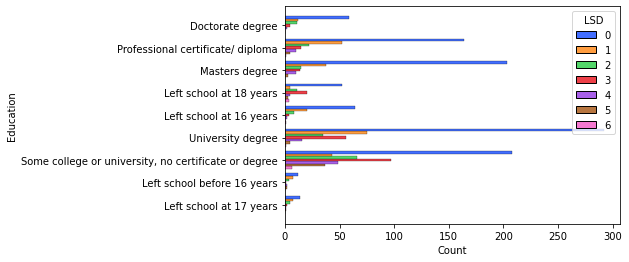

In [ ]:
sns.histplot(y= df_means["Education"],hue = df_means['LSD'], multiple="dodge",shrink=.8, palette="bright")

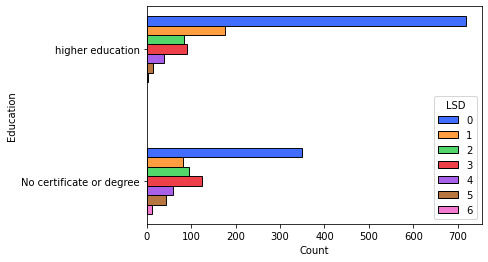

In [ ]:
sns.histplot(y= df_drugs_binaryE["Education"],hue = df_drugs_binaryE['LSD'], multiple="dodge",shrink=.5, palette="bright")

- Aqui podemos notar que o consumo de LSD é maior em individuos sem diploma

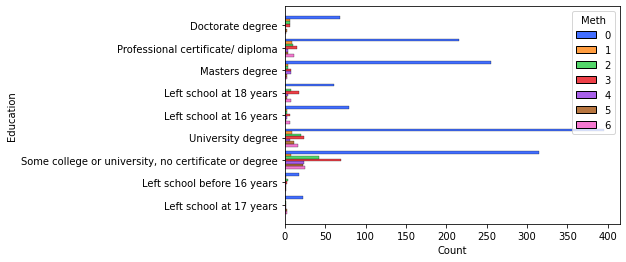

In [ ]:
sns.histplot(y= df_means["Education"],hue = df_means['Meth'], multiple="dodge",shrink=.8, palette="bright")

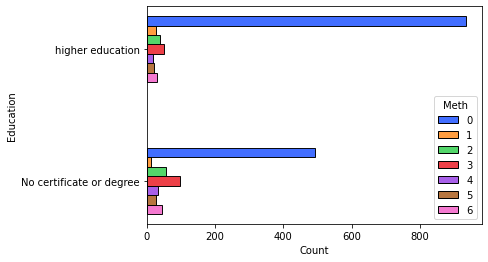

In [ ]:
sns.histplot(y= df_drugs_binaryE["Education"],hue = df_drugs_binaryE['Meth'], multiple="dodge",shrink=.5, palette="bright")

- Aqui podemos notar que o consumo de Metanfetamina é maior em individuos sem diploma

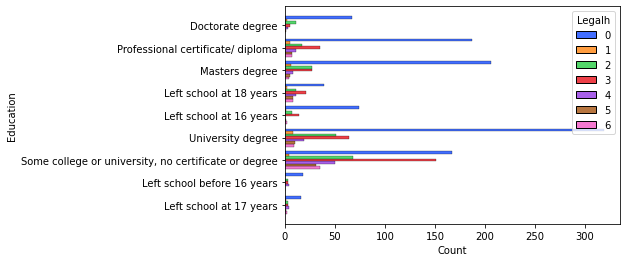

In [ ]:
sns.histplot(y= df_means["Education"],hue = df_means['Legalh'], multiple="dodge",shrink=.8, palette="bright")

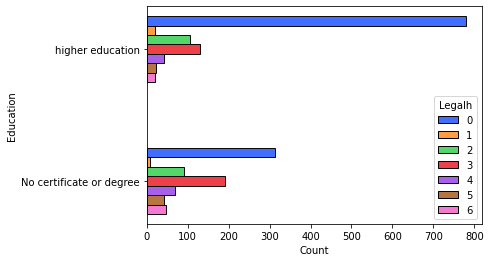

In [ ]:
sns.histplot(y= df_drugs_binaryE["Education"],hue = df_drugs_binaryE['Legalh'], multiple="dodge",shrink=.5, palette="bright")

- Aqui podemos notar que o consumo de Drogas legais é levemente maior em quem tem não tem diploma

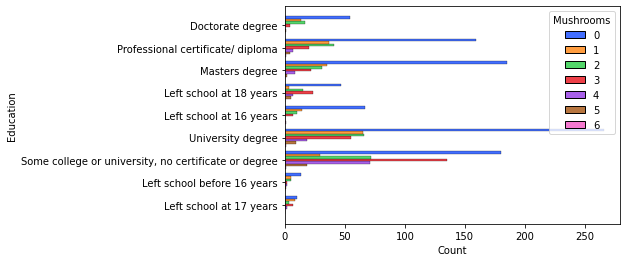

In [ ]:
sns.histplot(y= df_means["Education"],hue = df_means['Mushrooms'], multiple="dodge",shrink=.8, palette="bright")

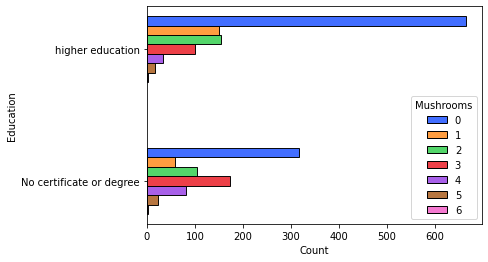

In [ ]:
sns.histplot(y= df_drugs_binaryE["Education"],hue = df_drugs_binaryE['Mushrooms'], multiple="dodge",shrink=.5, palette="bright")

- Aqui podemos notar que o consumo de cogumelos é maior em quem tem não tem diploma

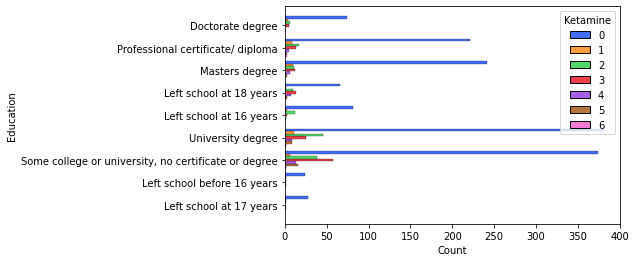

In [ ]:
sns.histplot(y= df_means["Education"],hue = df_means['Ketamine'], multiple="dodge",shrink=.8, palette="bright")

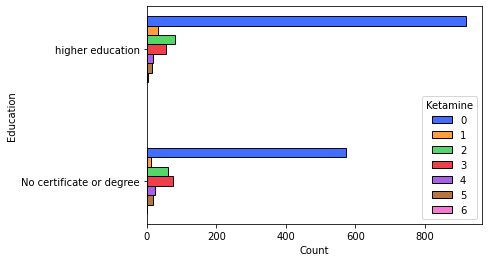

In [ ]:
sns.histplot(y= df_drugs_binaryE["Education"],hue = df_drugs_binaryE['Ketamine'], multiple="dodge",shrink=.5, palette="bright")

- Aqui podemos notar que o consumo de Ketaminas é levemente maior em quem tem não tem diploma

### ***Resposta: Maconha e Nicotina são usadas com mais frequencia majoritariamente por pessoas sem formação de nivel superior***

Com a analise grafica conseguimos inferir que a maior parte das pessoas que fazem uso mais frequente de substancias como Cannabis, nicotina, cogumelos, LSD, Metanfetamina e drogas legais não possuem diploma de educação superior. Ainda que em substancias como alcool, Crack e Cocaina a relação do consumo e o o nivel de escolaridade dos individuos seja irrisória.  

## 2. Há alguma influência de genero no consumo de drogas?


Da mesma forma como feito anteriormente, para responder essa pergunta utilizamos uma analise grafica de histogramas da relação entre o gênero e o consumo de cada droga em seguida foi feito um mapa de calor pra analisar ainda a relação entre o genero, a idade e a frequencia de consumo de cada droga


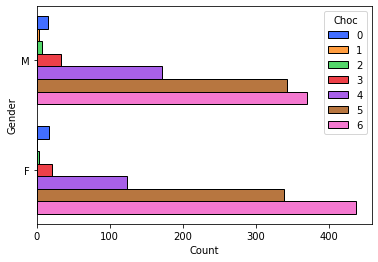

In [ ]:
sns.histplot(y= df_means["Gender"],hue = df_means['Choc'], multiple="dodge",shrink=.8, palette="bright")

- Aqui Podemos notar que o consumo de chocolate é maior no genero feminino


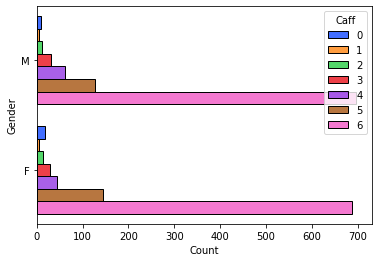

In [ ]:
sns.histplot(y= df_means["Gender"],hue = df_means['Caff'], multiple="dodge",shrink=.8, palette="bright")

- Aqui Podemos notar que o consumo de cafeina tem pouca diferença quanto ao genero do individuo

### **Os demais histogramas demonstram que o consumo mais frequente das demais drogas são de individuos do sexo: masculino**

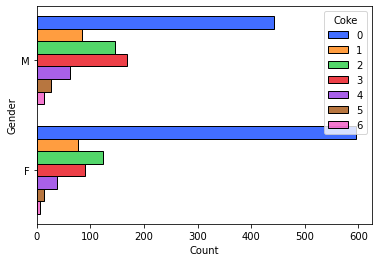

In [ ]:
sns.histplot(y= df_means["Gender"],hue = df_means['Coke'], multiple="dodge",shrink=.8, palette="bright")

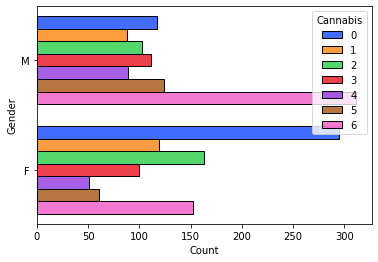

In [ ]:
sns.histplot(y= df_means["Gender"],hue = df_means['Cannabis'], multiple="dodge",shrink=.8, palette="bright")

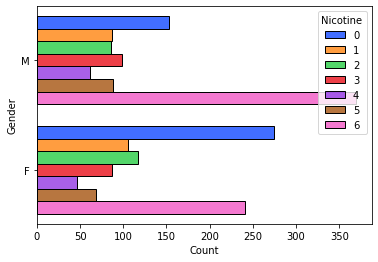

In [ ]:
sns.histplot(y= df_means["Gender"],hue = df_means['Nicotine'], multiple="dodge",shrink=.8, palette="bright")

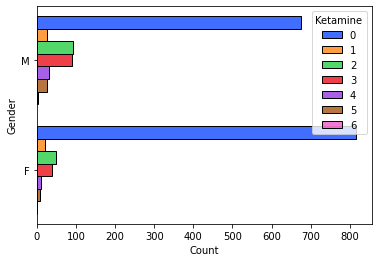

In [ ]:
sns.histplot(y= df_means["Gender"],hue = df_means['Ketamine'], multiple="dodge",shrink=.8, palette="bright")

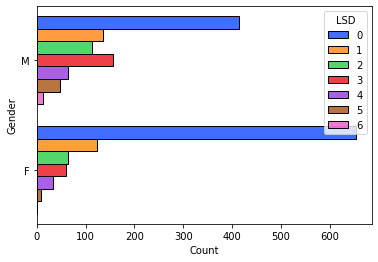

In [ ]:
sns.histplot(y= df_means["Gender"],hue = df_means['LSD'], multiple="dodge",shrink=.8, palette="bright")

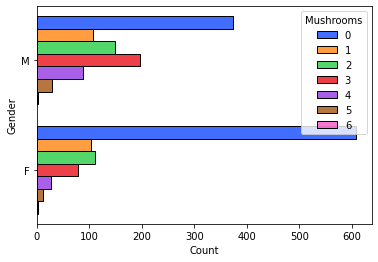

In [ ]:
sns.histplot(y= df_means["Gender"],hue = df_means['Mushrooms'], multiple="dodge",shrink=.8, palette="bright")

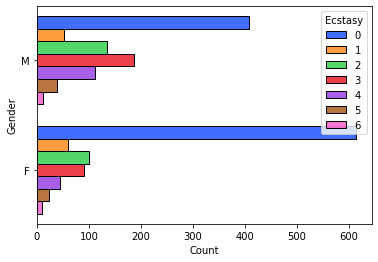

In [ ]:
sns.histplot(y= df_means["Gender"],hue = df_means['Ecstasy'], multiple="dodge",shrink=.8, palette="bright")

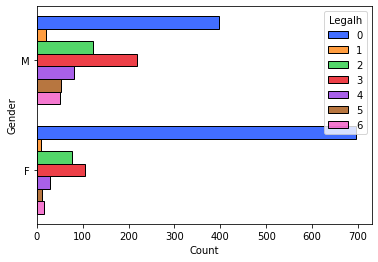

In [ ]:
sns.histplot(y= df_means["Gender"],hue = df_means['Legalh'], multiple="dodge",shrink=.8, palette="bright")

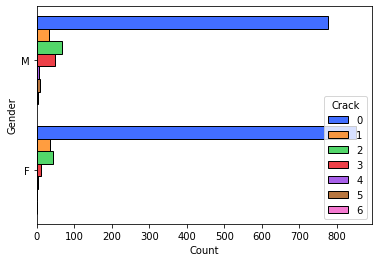

In [ ]:
sns.histplot(y= df_means["Gender"],hue = df_means['Crack'], multiple="dodge",shrink=.8, palette="bright")

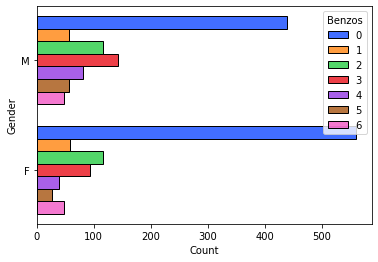

In [ ]:
sns.histplot(y= df_means["Gender"],hue = df_means['Benzos'], multiple="dodge",shrink=.8, palette="bright")

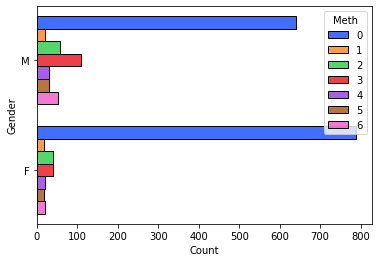

In [ ]:
sns.histplot(y= df_means["Gender"],hue = df_means['Meth'], multiple="dodge",shrink=.8, palette="bright")

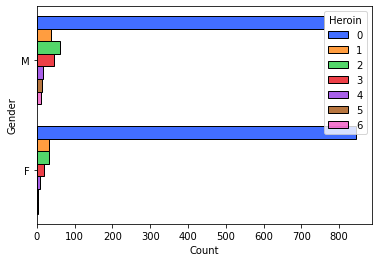

In [ ]:
sns.histplot(y= df_means["Gender"],hue = df_means['Heroin'], multiple="dodge",shrink=.8, palette="bright")

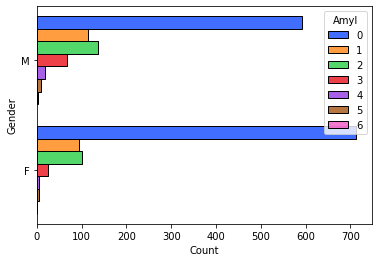

In [ ]:
sns.histplot(y= df_means["Gender"],hue = df_means['Amyl'], multiple="dodge",shrink=.8, palette="bright")

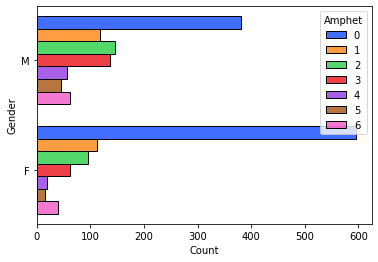

In [ ]:
sns.histplot(y= df_means["Gender"],hue = df_means['Amphet'], multiple="dodge",shrink=.8, palette="bright")

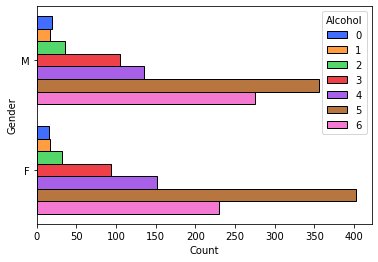

In [ ]:
sns.histplot(y= df_means["Gender"],hue = df_means['Alcohol'], multiple="dodge",shrink=.8, palette="bright")

### **Mapas de Calor**

- Mapas de calor relacionando a idade, genero e consumo de determinada droga (estes tambem se relacionam a proxima pergunta)

In [ ]:
df = {'M' : df_means.query("Gender == 'M'").loc[:, "Alcohol":"VSA"],
      'F' : df_means.query("Gender == 'F'").loc[:, "Alcohol":"VSA"]}

df['M']['Age'] = df_quant.query("Gender == -0.48246")["Age"]
df['M'] = df['M'].set_index(pd.Index(range(len(df['M']))))

df['F']['Age'] = df_quant.query("Gender == 0.48246")["Age"]
df['F'] = df['F'].set_index(pd.Index(range(len(df['F']))))


In [ ]:
def make_heatmap_bydrug(gender ,drug):
    data = df[gender].loc[:,['Age',drug]]
    l = (data['Age'].value_counts().index)
    c = data[drug].value_counts().index.sort_values()
    newdata = []

    p = data.value_counts()
    temp = []
    for i in l:
        for j in c:
            a = eval(f'({float(i)}, {int(j)})')
            if a in (list(p.index)):
                temp.append(p[a].astype(int))
            else:
                temp.append(0)
        newdata.append(temp)
        temp = []
    print(p)

    return pd.DataFrame(newdata, index = ['18-24', '25-34', '35-44', '45-54', '55-64', '65+'])

In [ ]:
MaleCaff = make_heatmap_bydrug('M', 'Caff')
FemaleCaff = make_heatmap_bydrug('F', 'Caff')
MaleAlc = make_heatmap_bydrug('M', 'Alcohol')
FemaleAlc = make_heatmap_bydrug('F', 'Alcohol')
FemaleNicote = make_heatmap_bydrug('F', 'Nicotine')
MaleNicote = make_heatmap_bydrug('M', 'Nicotine')
FemaleCannabis = make_heatmap_bydrug('F', 'Cannabis')
MaleCannabis = make_heatmap_bydrug('M', 'Cannabis')
FemaleLSD = make_heatmap_bydrug('F', 'LSD')
MaleLSD = make_heatmap_bydrug('M', 'LSD')

Age       Caff
-0.95197  6       264
-0.07854  6       140
 0.49788  6       124
 1.09449  6       120
-0.95197  5        77
 1.82213  6        40
-0.95197  4        35
-0.07854  5        27
-0.95197  3        22
 0.49788  5        13
-0.07854  4        10
 0.49788  4         8
 2.59171  6         8
 1.09449  4         7
 1.82213  5         6
-0.95197  2         6
 1.09449  5         5
-0.07854  3         5
          0         4
 0.49788  1         3
          3         3
 1.09449  2         2
 0.49788  0         2
-0.95197  0         2
 1.09449  3         1
          0         1
 0.49788  2         1
-0.07854  2         1
 1.82213  0         1
          1         1
          2         1
          3         1
 2.59171  1         1
          4         1
dtype: int64
Age       Caff
-0.07854  6       214
 0.49788  6       156
-0.95197  6       153
 1.09449  6       125
-0.95197  5        55
-0.07854  5        51
 1.82213  6        32
 0.49788  5        23
-0.95197  4        20
 0.49788  4

Text(33.0, 0.5, 'Idade')

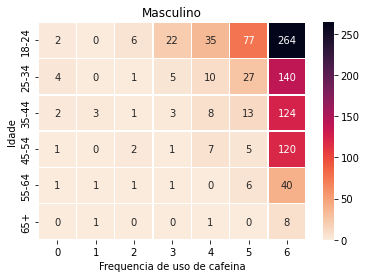

In [ ]:
v = sns.heatmap(MaleCaff, cmap="rocket_r", linewidths=.5, annot= True, fmt = "d")
v.set_title('Masculino')
v.set_xlabel('Frequencia de uso de cafeina')
v.set_ylabel('Idade')

Text(33.0, 0.5, 'Idade')

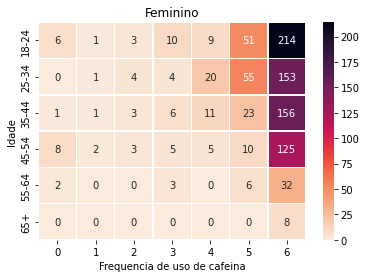

In [ ]:
v = sns.heatmap(FemaleCaff, cmap="rocket_r", linewidths=.5, annot= True, fmt = "d")
v.set_title('Feminino')
v.set_xlabel('Frequencia de uso de cafeina')
v.set_ylabel('Idade')

- Aqui nota-se que em ambos os generos consumo da cafeina é maior quanto mais jovem o individuo

Text(33.0, 0.5, 'Idade')

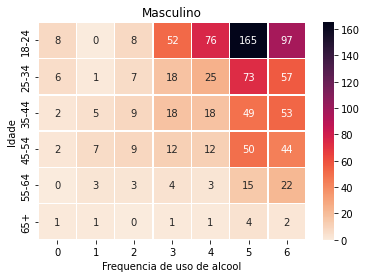

In [ ]:

v = sns.heatmap(MaleAlc, cmap="rocket_r", linewidths=.5, annot= True, fmt = "d")
v.set_title('Masculino')
v.set_xlabel('Frequencia de uso de alcool')
v.set_ylabel('Idade')


Text(33.0, 0.5, 'Idade')

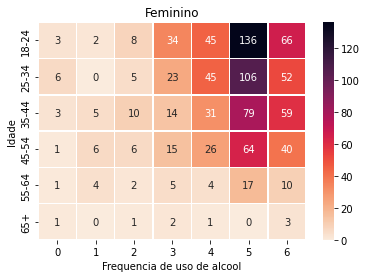

In [ ]:

v = sns.heatmap(FemaleAlc, cmap="rocket_r", linewidths=.5, annot= True, fmt = "d")
v.set_title('Feminino')
v.set_xlabel('Frequencia de uso de alcool')
v.set_ylabel('Idade')


- Aqui nota-se que em ambos os generos consumo da alcool é maior quanto mais jovem o individuo

Text(33.0, 0.5, 'Idade')

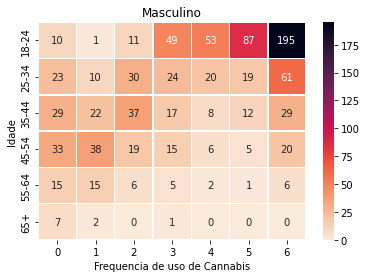

In [ ]:
v = sns.heatmap(MaleCannabis, cmap="rocket_r", linewidths=.5, annot= True, fmt = "d")
v.set_title('Masculino')
v.set_xlabel('Frequencia de uso de Cannabis')
v.set_ylabel('Idade')


Text(33.0, 0.5, 'Idade')

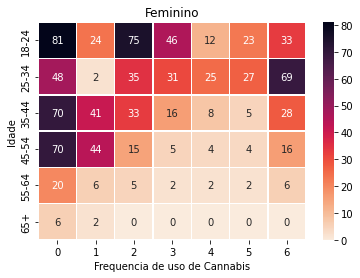

In [ ]:
v = sns.heatmap(FemaleCannabis, cmap="rocket_r", linewidths=.5, annot= True, fmt = "d")
v.set_title('Feminino')
v.set_xlabel('Frequencia de uso de Cannabis')
v.set_ylabel('Idade')


- Aqui, entrando nas drogas ilicitas, percebemos que as mulheres costumam não utilizar Cannabis, mesmo as mais jovens, o oposto dos homens que continuam seguindo a tendencia de quanto mais jovem mais utilizar maconha




Text(33.0, 0.5, 'Idade')

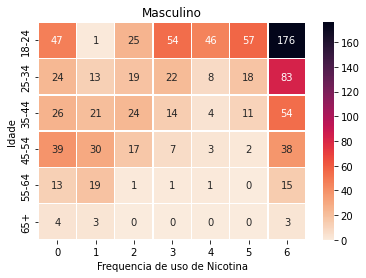

In [ ]:
v = sns.heatmap(MaleNicote, cmap="rocket_r", linewidths=.5, annot= True, fmt = "d")
v.set_title('Masculino')
v.set_xlabel('Frequencia de uso de Nicotina')
v.set_ylabel('Idade')


Text(33.0, 0.5, 'Idade')

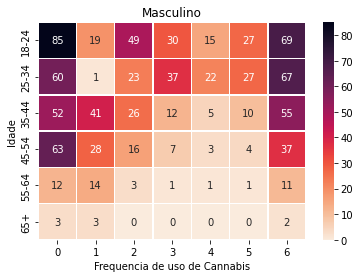

In [ ]:
v = sns.heatmap(FemaleNicote, cmap="rocket_r", linewidths=.5, annot= True, fmt = "d")
v.set_title('Masculino')
v.set_xlabel('Frequencia de uso de Nicotina')
v.set_ylabel('Idade')


- Mais uma vez as tendendo não utilizar tanto assim nicotina quanto os homens, mesmo as mais jovens


Text(33.0, 0.5, 'Idade')

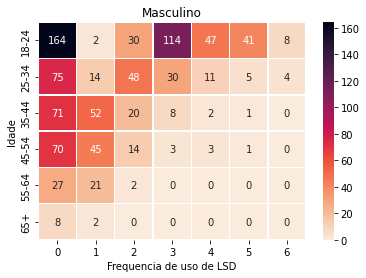

In [ ]:
v = sns.heatmap(MaleLSD, cmap="rocket_r", linewidths=.5, annot= True, fmt = "d")
v.set_title('Masculino')
v.set_xlabel('Frequencia de uso de LSD')
v.set_ylabel('Idade')


Text(33.0, 0.5, 'Idade')

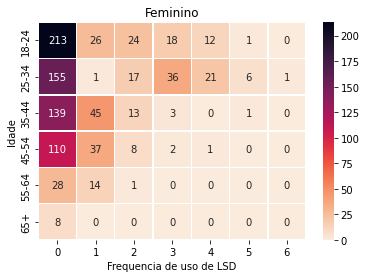

In [ ]:
v = sns.heatmap(FemaleLSD, cmap="rocket_r", linewidths=.5, annot= True, fmt = "d")
v.set_title('Feminino')
v.set_xlabel('Frequencia de uso de LSD')
v.set_ylabel('Idade')


- **No caso da LSD, ambos os generos não costumam utilizar, especialmente entre 18 e 54 anos**

### ***2. Resposta: O consumo de drogas esta majoritariamente ligado ao sexo masculino***

## 3. Qual a relação entre a idade e a incidencia do uso de drogas?




---


Da mesma forma como feito anteriormente, para responder essa pergunta utilizamos uma analise grafica de histogramas da relação entre a faixa etaria e o consumo de cada droga, alem dos mapas de calor desenvolvidos para a resposta passada que tiveram grande valia para a confirmação da resposta desta pergunta tambem

Abaixo os histogramas seguem o claro padrão em que o consumo de substancias é igualmente proporcional ao quanto mais jovem é o individuo

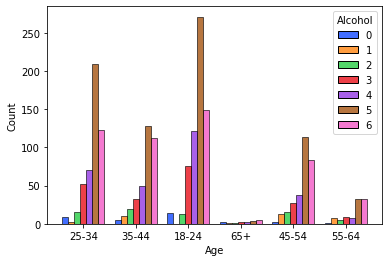

In [ ]:
sns.histplot(x= df_means["Age"],hue = df_means['Alcohol'], multiple="dodge",shrink=.8, palette="bright")

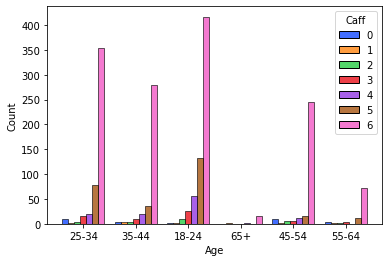

In [ ]:
sns.histplot(x= df_means["Age"],hue = df_means['Caff'], multiple="dodge",shrink=.8, palette="bright")

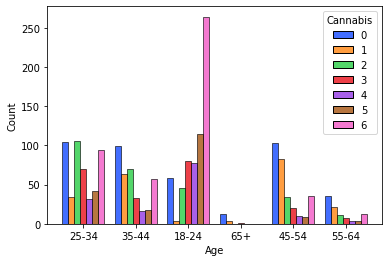

In [ ]:
sns.histplot(x= df_means["Age"],hue = df_means['Cannabis'], multiple="dodge",shrink=.8, palette="bright")

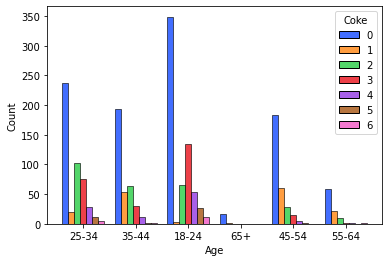

In [ ]:
sns.histplot(x= df_means["Age"],hue = df_means['Coke'], multiple="dodge",shrink=.8, palette="bright")

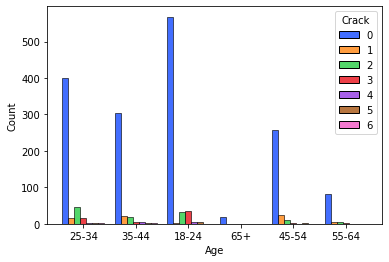

In [ ]:
sns.histplot(x= df_means["Age"],hue = df_means['Crack'], multiple="dodge",shrink=.8, palette="bright")

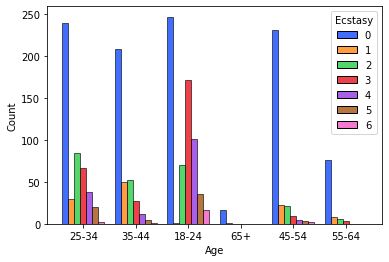

In [ ]:
sns.histplot(x= df_means["Age"],hue = df_means['Ecstasy'], multiple="dodge",shrink=.8, palette="bright")

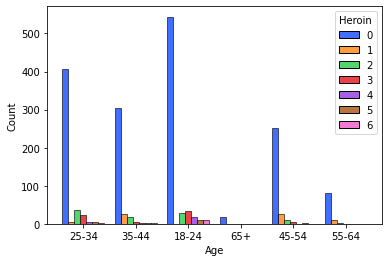

In [ ]:
sns.histplot(x= df_means["Age"],hue = df_means['Heroin'], multiple="dodge",shrink=.8, palette="bright")

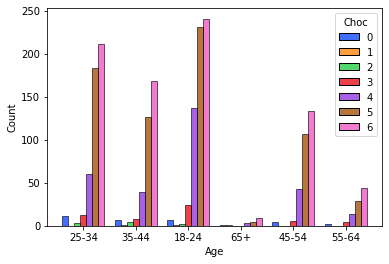

In [ ]:
sns.histplot(x= df_means["Age"],hue = df_means['Choc'], multiple="dodge",shrink=.8, palette="bright")

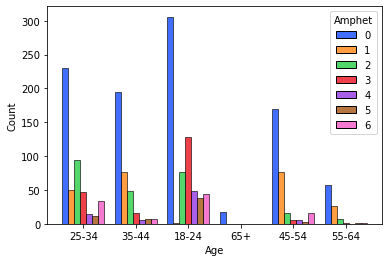

In [ ]:
sns.histplot(x= df_means["Age"],hue = df_means['Amphet'], multiple="dodge",shrink=.8, palette="bright")

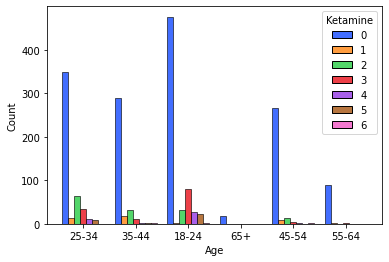

In [ ]:
sns.histplot(x= df_means["Age"],hue = df_means['Ketamine'], multiple="dodge",shrink=.8, palette="bright")

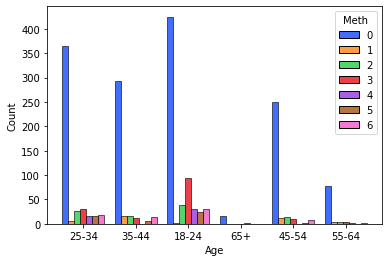

In [ ]:
sns.histplot(x= df_means["Age"],hue = df_means['Meth'], multiple="dodge",shrink=.8, palette="bright")

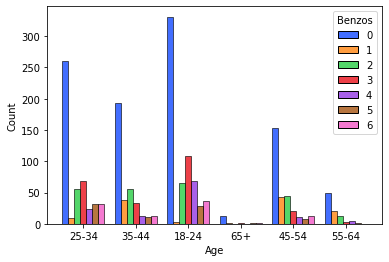

In [ ]:
sns.histplot(x= df_means["Age"],hue = df_means['Benzos'], multiple="dodge",shrink=.8, palette="bright")

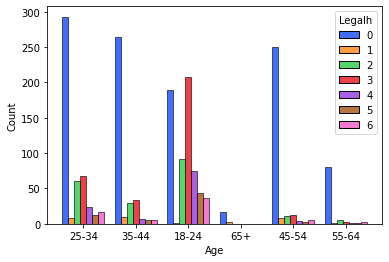

In [ ]:
sns.histplot(x= df_means["Age"],hue = df_means['Legalh'], multiple="dodge",shrink=.8, palette="bright")

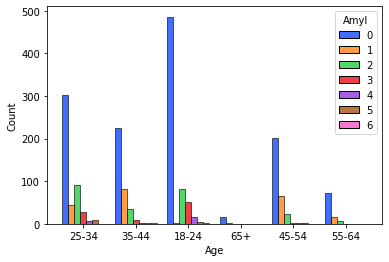

In [ ]:
sns.histplot(x= df_means["Age"],hue = df_means['Amyl'], multiple="dodge",shrink=.8, palette="bright")

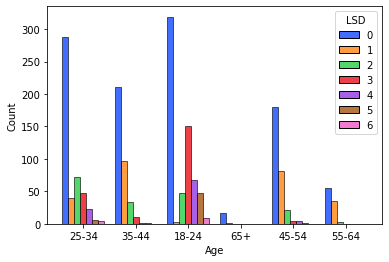

In [ ]:
sns.histplot(x= df_means["Age"],hue = df_means['LSD'], multiple="dodge",shrink=.8, palette="bright")

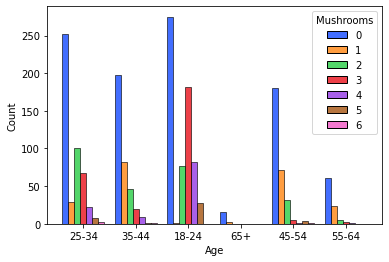

In [ ]:
sns.histplot(x= df_means["Age"],hue = df_means['Mushrooms'], multiple="dodge",shrink=.8, palette="bright")

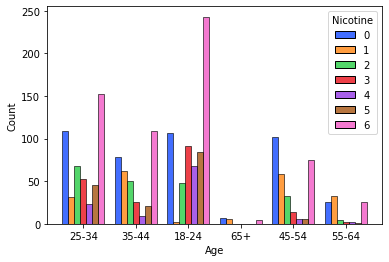

In [ ]:
sns.histplot(x= df_means["Age"],hue = df_means['Nicotine'], multiple="dodge",shrink=.8, palette="bright")

### ***3. Resposta: Assim os jovem de 18 a 24 anos são a faixa etaria onde mais há ocorrencia do uso frequete dessas drogas, sendo notavel a relação inversamente proporcional entre o consumo de drogas e a idade (Quanto menor a idade, mais a frequencia de consumo de drogas)***

# ***Conclusão***

De acordo com essa analise fomos capaz de entender quem são os mais atingidos pelo problemas do vicio em drogas: Homens, jovens e de baixa escolaridade (sem universidade completa). Com base nisso será possivel montar novas estrategias para lidar com esse problema, como por exemplo fomentar campanhas de conscientização quanto as drogas com enfoque especifico no perfil aqui traçado, afim de remediar tratando o problema onde ficam suas raizes mais profundas. 